In [477]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [478]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
combine = [train_df, test_df]

In [479]:
train_df0 = train_df.copy()

In [480]:
print('+++++++++++++++++++++++++++++++')
print('Train size:', train_df.shape)
print('Test size:', test_df.shape)
print('-------------------------------')
print('Train columns :', train_df.columns.values)
print('Test columns :', test_df.columns.values )
print('+++++++++++++++++++++++++++++++')

+++++++++++++++++++++++++++++++
Train size: (891, 12)
Test size: (418, 11)
-------------------------------
Train columns : ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Test columns : ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
+++++++++++++++++++++++++++++++


In [481]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [482]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [483]:
train_df['Survived'].value_counts() #데이터 개수를 세준다.

0    549
1    342
Name: Survived, dtype: int64

In [484]:
train_df['Survived'].value_counts() # 0은 죽은사람, 1은 산 사람이다

0    549
1    342
Name: Survived, dtype: int64

In [485]:
train_df.Survived.value_counts() #위와 같다

0    549
1    342
Name: Survived, dtype: int64

((342) / (342+549) )*100 = 생존율을 계산하고 싶은데, 저 값들을 어떻게 뽑아내는지 모르겠다.

In [486]:
train_df.Survived.value_counts()[0]

549

찾았당.. ㅋㅋ;

In [487]:
사망자 = train_df.Survived.value_counts()[0]
생존자 = train_df.Survived.value_counts()[1]


print('생존률: {}% '.format(round(((생존자 / (생존자+사망자) )*100),1))) # 소수 두번째 자리에서 반올림 : ", round(num, 1))


생존률: 38.4% 


In [488]:
train_df.Pclass.value_counts() # Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [489]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [490]:
train_df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [491]:
np.sort(train_df.Age.unique())
# type(train_df.Age.unique()) #numpy.ndarray


# 어레이.sort() : 원본 배열의 값이 변경됨
# np.sort(어레이) : 정렬된 배열의 복사본 생성, 원본은 변경 없음

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

In [492]:
# train_df.SibSp.unique() #array([1, 0, 3, 4, 2, 5, 8], dtype=int64)
train_df.SibSp.value_counts() # SibSp : 함께 탄 형제 자매, 또는 배우자

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

확인작업이 반복되는 것 같다. 함수를 만들어볼까?

In [493]:
def check(a):
    print(train_df.a.unique())
    print(train_df.a.value_counts())
    return 

In [494]:
# check(Age)

간단한 함수 같은데 실행이 안된다 ^^; 정의되지 않은 변수라는 것 같다.. ㅠㅠ

In [495]:
train_df.Parch.unique() #array([0, 1, 2, 5, 3, 4, 6], dtype=int64)
train_df.Parch.value_counts() # Parch : 부모, 자식 수

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [496]:
# train_df.Ticket.unique()
train_df.Ticket.value_counts().head(10) #티켓 넘버

347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
Name: Ticket, dtype: int64

In [497]:
# train_df.Fare.unique()
train_df.Fare.value_counts() #요금

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [498]:
# train_df.Cabin.unique()
train_df.Cabin.value_counts().head(10) #방 호수

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
F2             3
E101           3
D              3
C78            2
C93            2
Name: Cabin, dtype: int64

In [499]:
# train_df.Embarked.unique() # array(['S', 'C', 'Q', nan], dtype=object)
train_df.Embarked.value_counts() #탑승지 C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

S    644
C    168
Q     77
Name: Embarked, dtype: int64

NAN 값 확인하자

In [500]:
# train_df.info() #총 데이터 개수는 891
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 데이터 전처리

변수 제거

In [501]:
# train_df = train_df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1)
# PassengerId 인덱스 수준이라 제거
# Name 이름으로 특징을 설명할 수 없기에 제거
# Ticket은 제거 안하고 싶다. 나름 장소 대신 사용할 수 없을까?
# Fare 운임도 뭐 나쁘지 않은듯 
# Cabin 방 호수는 결측치가 너무 많다.. 살리지 못할 것 같다.. ㅠㅠ (살려봐?)

train_df = train_df.drop(['PassengerId','Name','Cabin'], axis=1)

print(train_df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')


결측치 채우기

In [502]:
#결측치 행 인덱스 찾기

train_df['Embarked'][train_df['Embarked'].isnull()]

61     NaN
829    NaN
Name: Embarked, dtype: object

In [503]:
train_df.loc[61]

Survived         1
Pclass           1
Sex         female
Age           38.0
SibSp            0
Parch            0
Ticket      113572
Fare          80.0
Embarked       NaN
Name: 61, dtype: object

In [504]:
train_df.loc[61, 'Embarked'] = 'S'

In [505]:
train_df.loc[829]

Survived         1
Pclass           1
Sex         female
Age           62.0
SibSp            0
Parch            0
Ticket      113572
Fare          80.0
Embarked       NaN
Name: 829, dtype: object

In [506]:
train_df.loc[829, 'Embarked'] = 'S'

In [507]:
train_df['Embarked'][train_df['Embarked'].isnull()]

Series([], Name: Embarked, dtype: object)

In [508]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

나이 결측치 행 제거

In [509]:
# 개인적으로 나이가 중요한 요소이지 않을까 하여, 좋은 데이터 질을 갖기 위해 나이가 nan인 데이터를 삭제하겠다.

train_df = train_df.dropna(axis=0)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,382652,29.1250,Q
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [510]:
train_df.isnull().sum()
#결측치가 모두 사라진 모습. 데이터는 많이 줄었다.

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [511]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,382652,29.1250,Q
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
889,1,1,male,26.0,0,0,111369,30.0000,C


Sex와 Emb가 문자다. 숫자로 대응시켜주자.

Pandas에는 정수 기반의 범주형 데이터를 표현(인코딩)할 수 있는 
Categorical형이라고 하는 특수한 데이터형이 존재한다.

In [512]:
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Sex'] = train_df['Sex'].cat.codes
train_df['Sex'] # male = 1, female = 0

0      1
1      0
2      0
3      0
4      1
      ..
885    0
886    1
887    0
889    1
890    1
Name: Sex, Length: 714, dtype: int8

In [513]:
train_df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
885    Q
886    S
887    S
889    C
890    Q
Name: Embarked, Length: 714, dtype: object

In [514]:
train_df['Embarked'] = train_df['Embarked'].astype('category')
train_df['Embarked'] = train_df['Embarked'].cat.codes
train_df['Embarked'] # C = 0, Q = 1, S = 2

0      2
1      0
2      2
3      2
4      2
      ..
885    1
886    2
887    2
889    0
890    1
Name: Embarked, Length: 714, dtype: int8

In [515]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int8   
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Ticket    714 non-null    object 
 7   Fare      714 non-null    float64
 8   Embarked  714 non-null    int8   
dtypes: float64(2), int64(4), int8(2), object(1)
memory usage: 46.0+ KB


In [516]:
train_df['Ticket'] = train_df['Ticket'].astype('category')
train_df['Ticket'] = train_df['Ticket'].cat.codes
train_df['Ticket']

0      408
1      471
2      532
3       40
4      373
      ... 
885    377
886     83
887     12
889      8
890    371
Name: Ticket, Length: 714, dtype: int16

In [517]:
train_df.info()
#모든 숫자형으로 바뀌었다. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int8   
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Ticket    714 non-null    int16  
 7   Fare      714 non-null    float64
 8   Embarked  714 non-null    int8   
dtypes: float64(2), int16(1), int64(4), int8(2)
memory usage: 41.8 KB


### 데이터 탐색 및 시각화

In [518]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.634454,29.699118,0.512605,0.431373,269.401961,34.694514,1.596639
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,159.135346,52.918930,0.778238
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,128.250000,8.050000,2.000000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,272.000000,15.741700,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,413.750000,33.375000,2.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,541.000000,512.329200,2.000000


<AxesSubplot:>

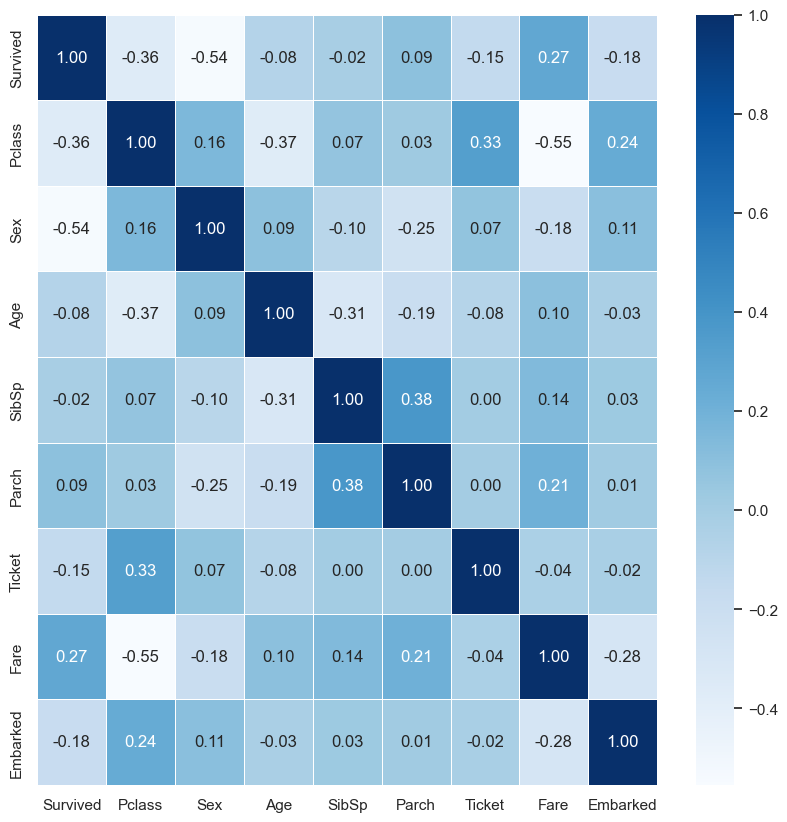

In [519]:
plt.figure(figsize=(10,10))
sns.heatmap(data = train_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

생존자와 성별의 상관관계가 가장 높다

In [520]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,408,7.2500,2
1,1,1,0,38.0,1,0,471,71.2833,0
2,1,3,0,26.0,0,0,532,7.9250,2
3,1,1,0,35.0,1,0,40,53.1000,2
4,0,3,1,35.0,0,0,373,8.0500,2
...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,377,29.1250,1
886,0,2,1,27.0,0,0,83,13.0000,2
887,1,1,0,19.0,0,0,12,30.0000,2
889,1,1,1,26.0,0,0,8,30.0000,0


In [521]:
for i in range(1,train_df.shape[1]):
    print(train_df[[train_df.columns[i], "Survived"]].groupby([train_df.columns[i]], as_index=False).
          mean().sort_values(by='Survived', ascending=False))
    print('===================================')

   Pclass  Survived
0       1  0.655914
1       2  0.479769
2       3  0.239437
   Sex  Survived
0    0  0.754789
1    1  0.205298
      Age  Survived
0    0.42       1.0
9    5.00       1.0
79  63.00       1.0
68  53.00       1.0
1    0.67       1.0
..    ...       ...
37  28.50       0.0
49  36.50       0.0
46  34.50       0.0
26  20.50       0.0
30  23.50       0.0

[88 rows x 2 columns]
   SibSp  Survived
1      1  0.530055
2      2  0.440000
0      0  0.371550
3      3  0.333333
4      4  0.166667
5      5  0.000000
   Parch  Survived
3      3  0.600000
2      2  0.573529
1      1  0.554545
0      0  0.357006
5      5  0.200000
4      4  0.000000
6      6  0.000000
     Ticket  Survived
0         0       1.0
379     379       1.0
128     128       1.0
129     129       1.0
416     416       1.0
..      ...       ...
316     316       0.0
315     315       0.0
314     314       0.0
313     313       0.0
271     271       0.0

[542 rows x 2 columns]
        Fare  Survived
110  23.00

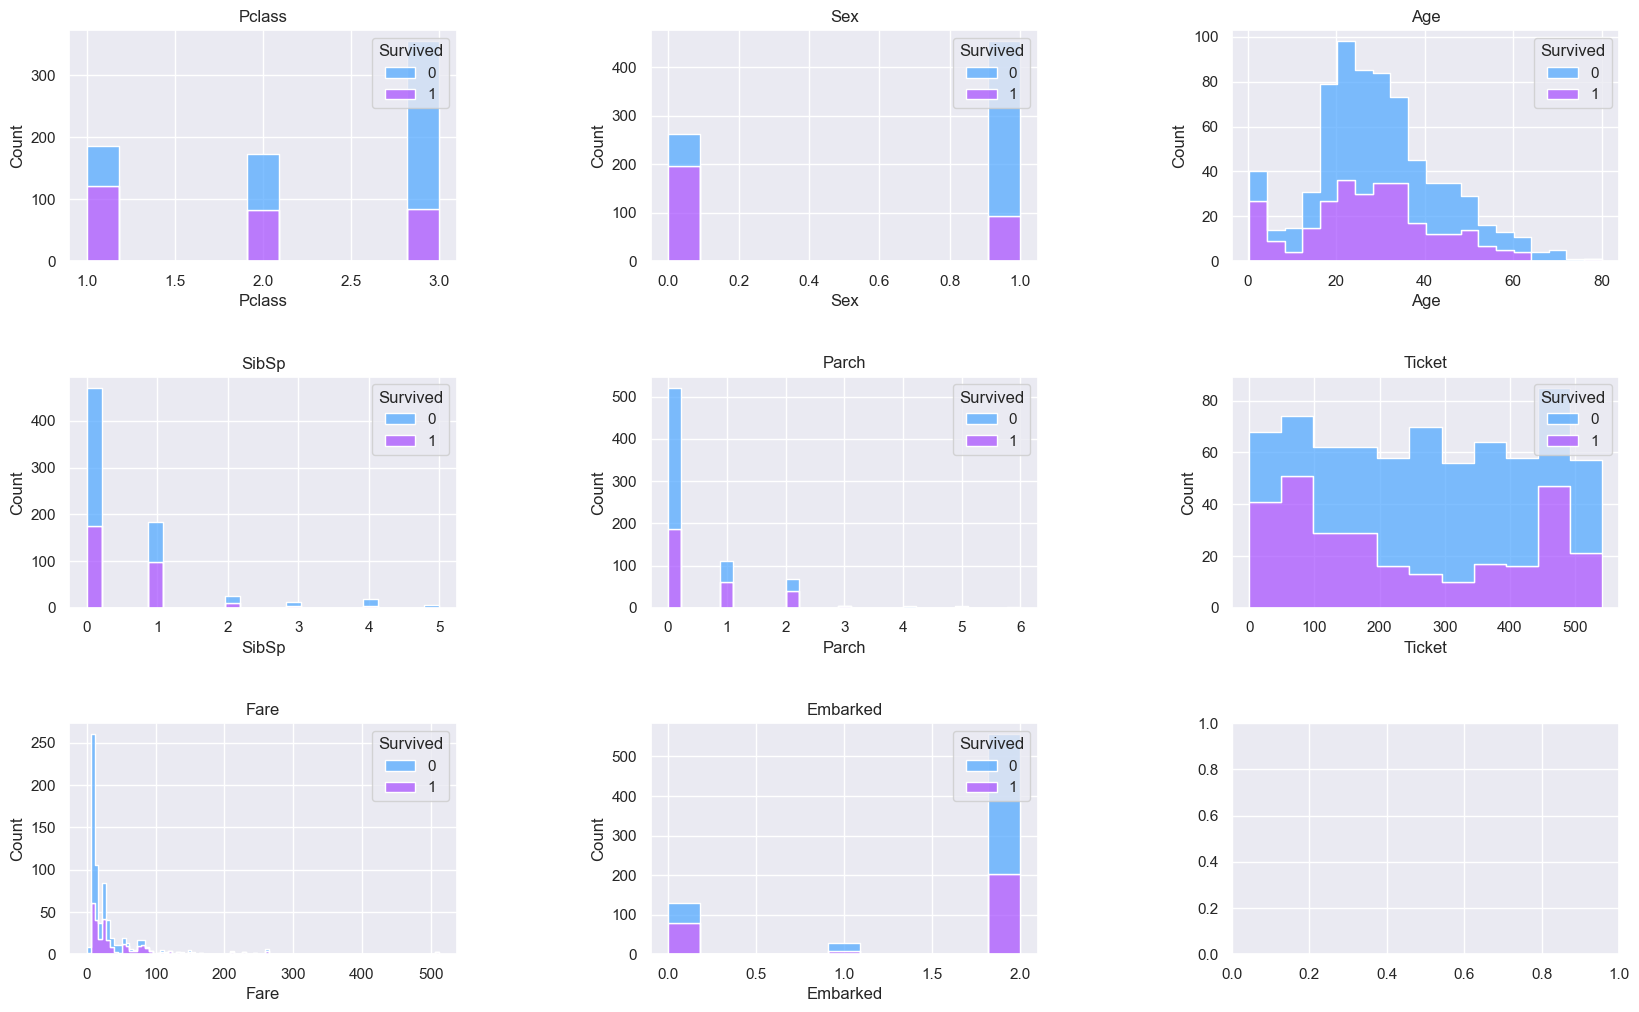

In [522]:
col_name = train_df.columns[1:]

fig, axs = plt.subplots(3,3, figsize=(20, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()

for i in range(col_name.shape[0]):
    sns.histplot(data=train_df,x=train_df[col_name[i]],hue='Survived',palette='cool',
                 multiple="stack",ax=axs[i], element="step")
    axs[i].set_title(col_name[i])

생존자와 죽은 자들의 데이터들을 분리해서 각각의 요소와 비교해보고 싶다..

In [523]:
# train_df_rand = train_df.copy()

# plt.figure(figsize=(9,9))
# rand = pd.DataFrame(np.random.randint(0,100,size=train_df.iloc[:,1:].shape), 
#                   columns=train_df.iloc[:,1:].columns)/400
# train_df_rand.iloc[:,1:]=train_df.iloc[:,1:]+rand
# sns.set(style="ticks")
# sns.pairplot(train_df_rand,hue='Survived',palette='cool')

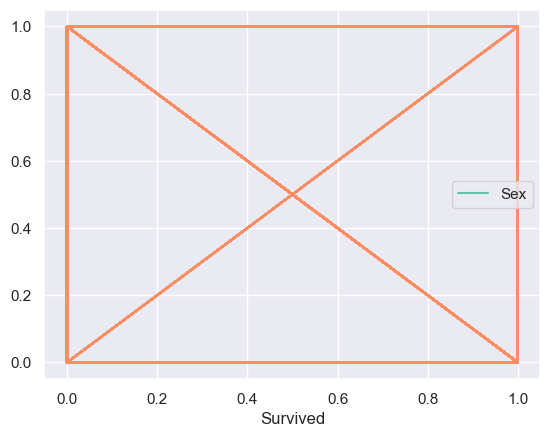

In [524]:
#망함

train_df[['Survived','Sex']].plot(x='Survived', y='Sex',rot=0)

#망함2

plt.plot(train_df['Sex'], train_df['Survived'])
plt.show()


<AxesSubplot:xlabel='Survived', ylabel='count'>

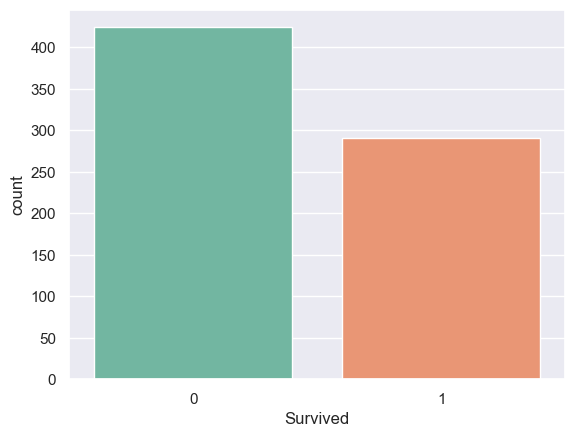

In [525]:
sns.countplot(x='Survived', data =train_df )
# 가장 기본적인 막대그래프 

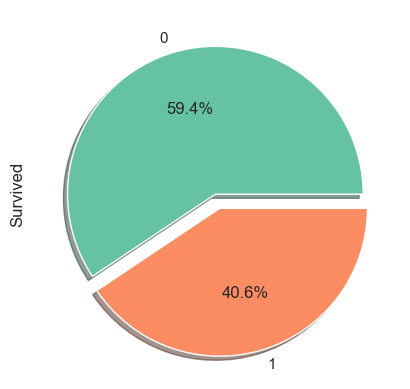

In [526]:
train_df["Survived"].value_counts().plot.pie( explode=[0,0.1], autopct='%1.1f%%', shadow=True)
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

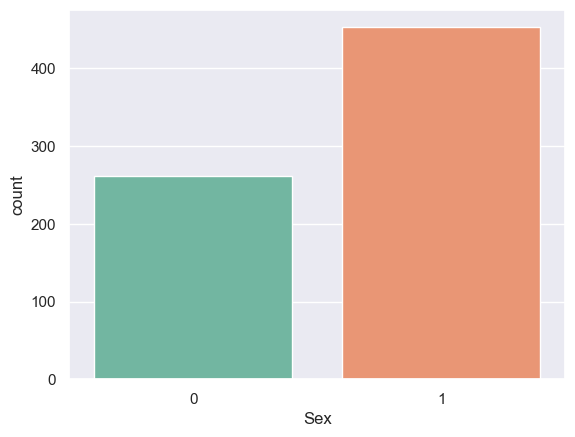

In [527]:
sns.countplot(x='Sex', data =train_df )

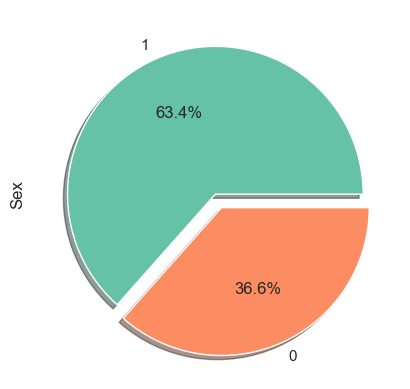

In [528]:
train_df["Sex"].value_counts().plot.pie( explode=[0,0.1], autopct='%1.1f%%', shadow=True)
plt.show()

In [531]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Survived', 'Dead'
sizes_m = [len(train_df.loc[ (train_df["Sex"]=='male') & (train_df["Survived"]==1)]), len(train_df.loc[ (train_df["Sex"]=='male')& (train_df["Survived"]==0)]) ]

sizes_f = [len(train_df.loc[ (train_df["Sex"]=='female') & (train_df["Survived"]==1)]),len(train_df.loc[ (train_df["Sex"]=='female')& (train_df["Survived"]==0)]) ]

explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig = plt.figure()
fig.set_size_inches(10,5)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(sizes_m, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('male')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.pie(sizes_f, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.set_title('female')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 1000x500 with 2 Axes>

In [ ]:
plt.style.use('ggplot')
sns.set()
sns.set_palette("Set2")

def chart(dataset, feature):
    survived = dataset[dataset['Survived'] == 1][feature].value_counts()
    dead = dataset[dataset['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True)

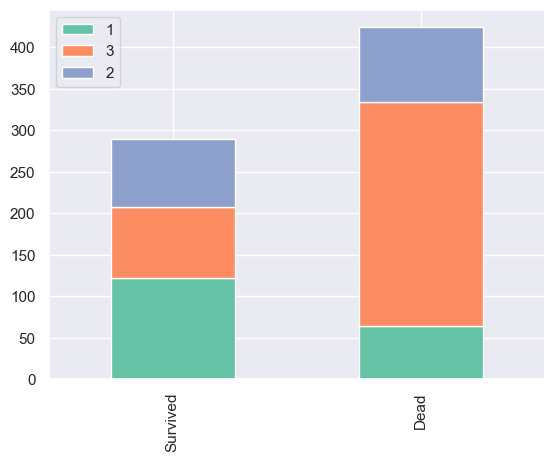

In [ ]:
chart(train_df, 'Pclass')

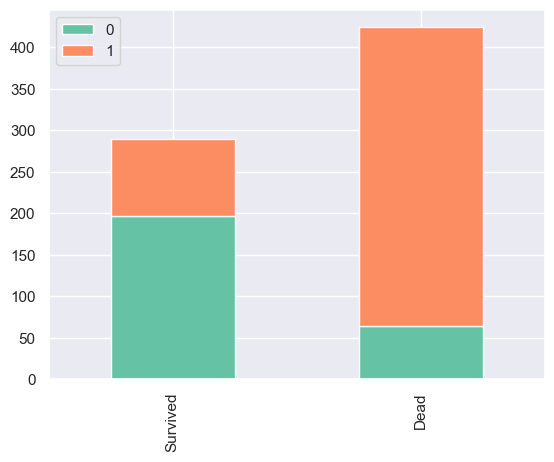

In [ ]:
chart(train_df, 'Sex')

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


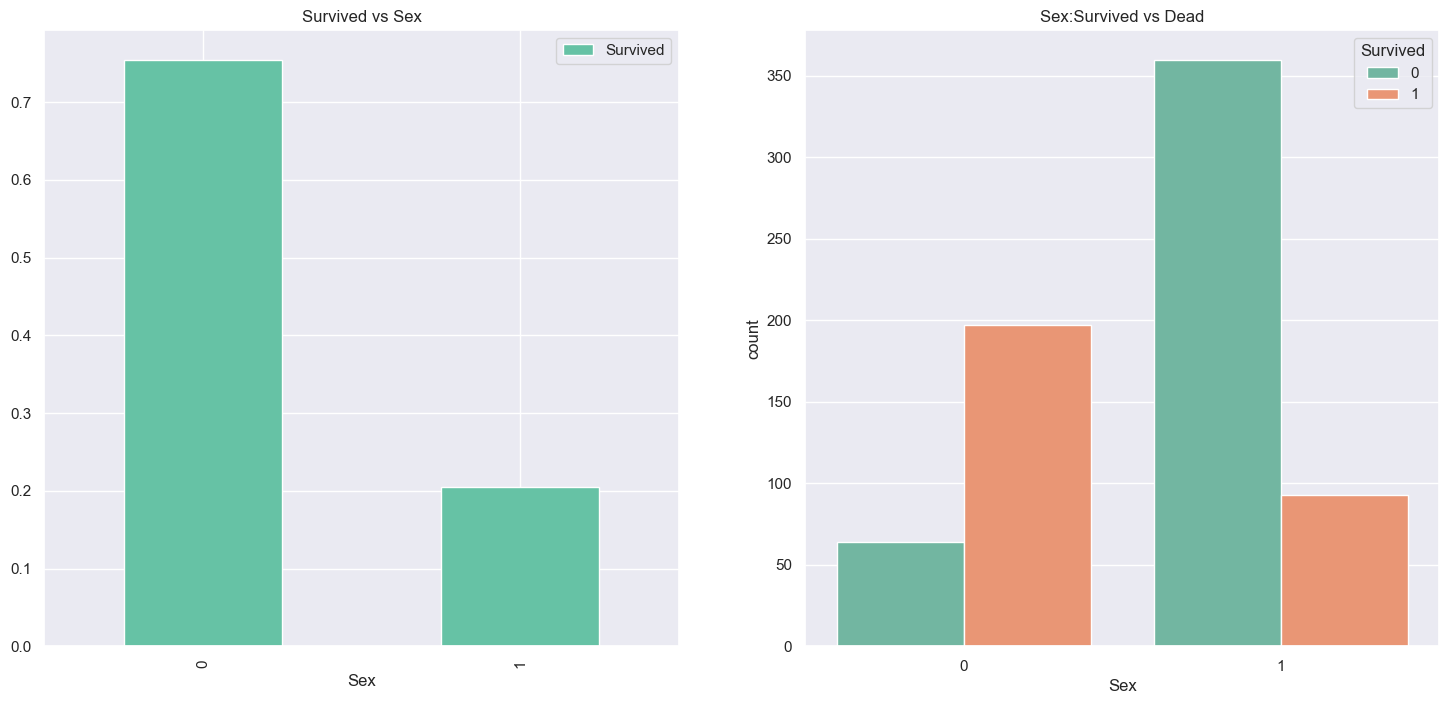

In [ ]:
# 성별에 따른 사망자와 생존자

f,ax=plt.subplots(1,2,figsize=(18,8))
train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=train_df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [ ]:
# 나이에 따른 사망자와 생존자

# f,ax=plt.subplots(1,2,figsize=(20,10))
# train_df[train_df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
# ax[0].set_title('Survived= 0')
# x1=list(range(0,85,5))
# ax[0].set_xticks(x1)
# train_df[train_df['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
# ax[1].set_title('Survived= 1')
# x2=list(range(0,85,5))
# ax[1].set_xticks(x2)
# plt.show()

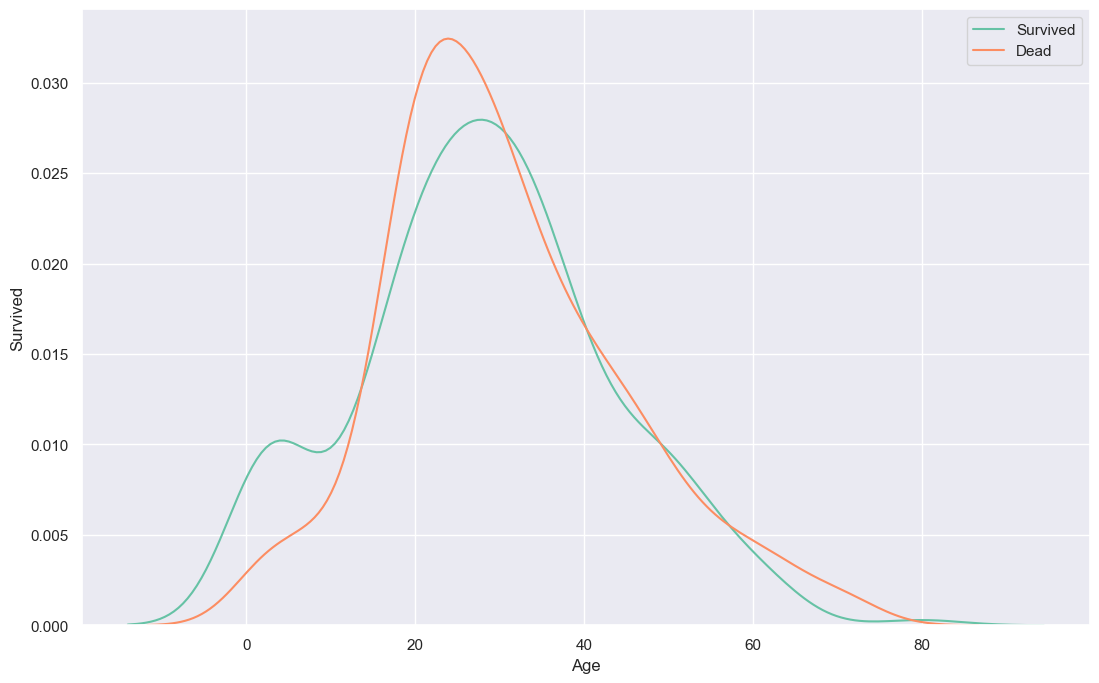

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(13,8))
sns.kdeplot(train_df[train_df['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(train_df[train_df['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()